<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
!pip install statsmodels

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install pandas

In [ ]:
!pip install sklearn

In [ ]:
!pip install yfinance

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

In [9]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

In [ ]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
#Train test split
to_row = int(len(df)*0.9)     # Result: 1816

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])
testing_data

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
#plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label= 'Test data')
plt.legend()

In [56]:
model_predict = []
n_test_ob = len(testing_data)   #202


In [ ]:
for i in range(n_test_ob):
  model = ARIMA(training_data, order= (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predict.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

In [76]:
for i in range(n_test_ob):
  model = ARIMA(training_data, order= (26,1,33))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[33])[33]
  model_predict.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  #print(output)
  #break

ValueError: ignored

In [ ]:
model_fit.summary()

In [40]:
len(model_predict)

204

In [36]:
len(testing_data)

202

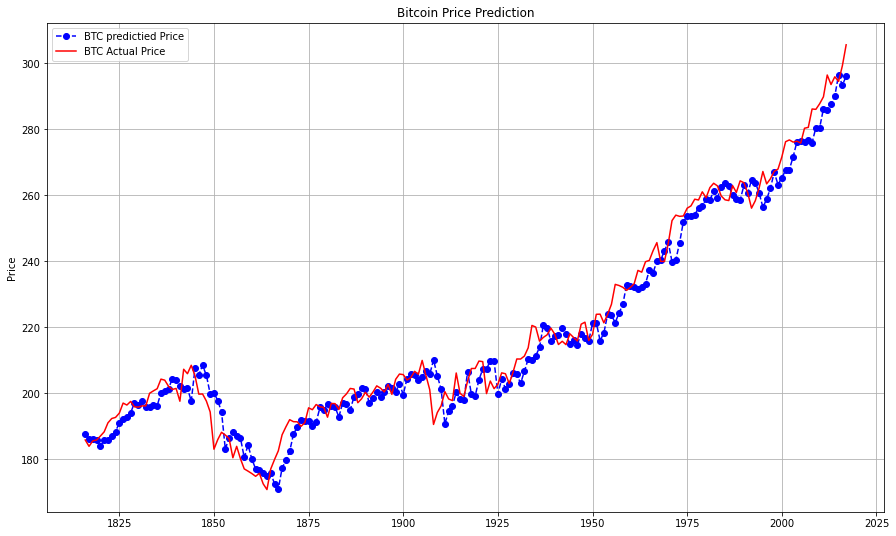

In [39]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range , model_predict[:-2], color = 'blue', marker = 'o', linestyle ='dashed', label = 'BTC predictied Price')
plt.plot(date_range,testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
#plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [46]:
#report performance
mape = np.mean(np.abs(np.array(model_predict[:-2]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' + str(mape))

MAPE: 0.019584478612894075


In [ ]:
from math import sqrt
mse = mean_squared_error(testing_data, model_predict[:-2])
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)